In [1]:
# import dependencies

import numpy as np 
import cv2

In [2]:
# upload image file

from google.colab import files
files.upload()

Saving org_image.png to org_image (1).png


{'org_image.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xca\x00\x00\x02W\x08\x06\x00\x00\x00\x13\x8c\x14\xdc\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\xff\xa5IDATx^\xec\xfdW\xaf-K\x92\xe7\x89\xf9\x92[\x1eq\xef\xcd{SWVf\x96\xca\xaa\xeelQ\xd5\xdd\x03pz\x08\xf6\x90 8\x04\xd9\xf3\xc2!\x1f\xf8F\x80\x1c\x80\xfc\x10\xf9=\xf8\x118\x00\x9f\t\x10\xdd\x9c\x19\xf4\xcc\xb4\xae\xca.\xd1UY\xa9*\xf5\xcd\xab\x8e\xd8r)\xda\xcf\xdc\xffk\xd9\xf2\x1dKmu\xf69\'\xfe\xe7\xd8\x8e\x08\x0f\x17\xe6\xe6\xeefn\x1e\x1e\xb1:\x7f\xf4_\xfc\x9fg\x93\xc9$u\xbb\xdd4\x9dN\xd3l6M\x13;\xf6\xecz0\x1c\xa6~\xaf\x9f\xce\xcf\xcfS\xa7\xd3I\x97\xa3|\x84@\xaf\xdbK\xdd^\xd7\xe2\xf4<.\xf9\x9c\x9c\x9cx>\x8a\xb3\x0e\xb3\xd4M\xbd~?\xed\xed\xed\xf9\xf5g\x9f~:?\x9f\xcdf~\\Bg\x9a\x8f\xd3\xc5\xbd\\N7_\x18f\xe5\xde`0HO\x9f>M\xcf_|\x96...R7d\xd7\x98w@\xcd\xfb\xba\xf8S\x8b\x9a\xcb\\\xf0\x00\x90\'\xb2\x99\x8c\'\x9e>\xe6Y\xe7\

In [3]:
# read image file

img = cv2.imread('/content/org_image.png')

In [4]:
# check the shape

img.shape

(599, 458, 3)

In [5]:
# reshape the image

img2 = img.reshape((-1,3))

In [6]:
img2.shape

(274342, 3)

## k-means clustering

In [7]:
# documentation link : https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html
# change the data type

X = np.float32(img2)

In [8]:
# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# number of clusters (k)
k = 6

# apply kmeans()
ret,label,center = cv2.kmeans(X,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # attempts = 10 

In [9]:
# convert back into uint8, and make original image

center = np.uint8(center)
reconstracted_img = center[label.flatten()]
reconstracted_img_2 = reconstracted_img.reshape((img.shape))

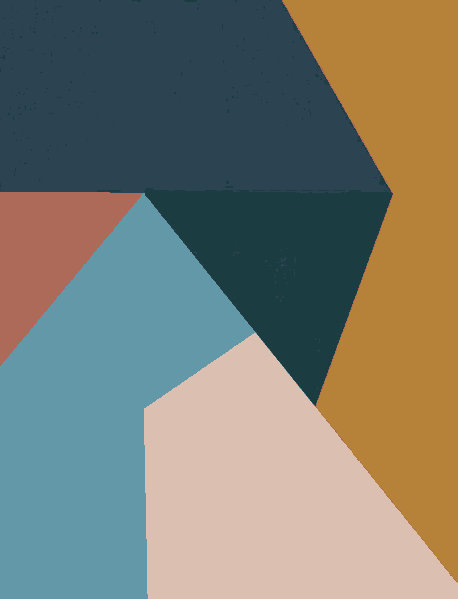

In [10]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_2)

In [11]:
cv2.imwrite("segmented_k_mean.jpg", reconstracted_img_2)

True

In [12]:
print(center)

[[ 88 106 173]
 [ 64  60  27]
 [178 192 219]
 [ 82  67  44]
 [168 152  98]
 [ 56 129 182]]


## Gaussian Mixture Model (GMM)

In [13]:
# import dependencies

from sklearn.mixture import GaussianMixture as GMM

In [14]:
# define an instance and fit the model

gmm_model = GMM(n_components = 6, covariance_type = 'tied').fit(img2)

In [15]:
# make prediction

prediction = gmm_model.predict(img2)

In [16]:
prediction[:100]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [17]:
# reconstract the image
prediction_ = prediction*12  # to make the image visible
reconstracted_img_gmm = prediction_.reshape(img.shape[0], img.shape[1])

In [18]:
# save new file
cv2.imwrite("segmented_k_gmm.jpg", reconstracted_img_gmm)

True

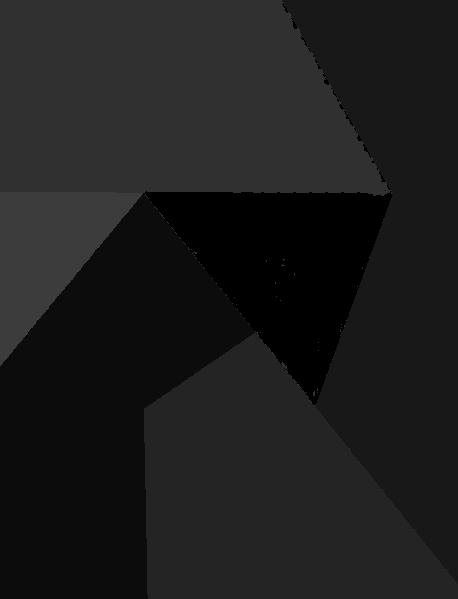

In [19]:
from google.colab.patches import cv2_imshow

cv2_imshow(reconstracted_img_gmm)

## Pick optimal number with BIC/AIC

In [20]:
# calculate BIC for GMM model

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)

bic_values = gmm_model.bic(img2)
print(bic_values)

7223393.509782241


In [21]:
# iterate value of n from 1 to 15

n_components = np.arange(1,15)

gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]

Text(0, 0.5, 'BIC_values')

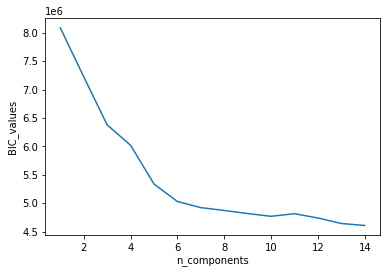

In [22]:
# plot BIC value for every value of n

from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')
plt.xlabel('n_components')
plt.ylabel('BIC_values')

after n=6 the graph is almost asymptotic. so n= 6 is the correct value.

Text(0, 0.5, 'AIC_values')

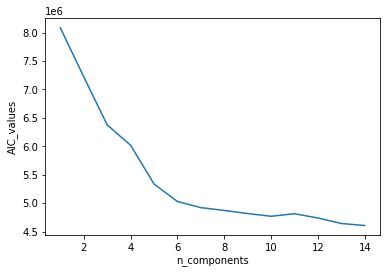

In [23]:
# plot AIC

plt.plot(n_components, [m.aic(img2) for m in gmm_models], label='AIC')
plt.xlabel('n_components')
plt.ylabel('AIC_values')

## Image Segmentation with Histogram

Try two different ways.

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 3.00000e+00, 2.00000e+00, 7.00000e+00, 4.00000e+00,
        1.50000e+01, 1.30000e+01, 1.90000e+01, 2.70000e+01, 3.10000e+01,
        4.00000e+01, 7.50000e+01, 7.80000e+01, 2.33000e+02, 1.47000e+02,
        3.34100e+03, 1.12900e+04, 3.08800e+03, 3.79600e+03, 1.49700e+03,
        6.54000e+02, 4.05000e+02, 3.38000e+02, 1.26000e+02, 2.67000e+02,
        2.54000e+02, 2.52000e+02, 1.51000e+02, 1.64000e+02, 2.85000e+02,
        3.61000e+02, 1.34600e+03, 1.53900e+03, 3.40000e+04, 1.25560e+04,
        5.79900e+03, 2.91600e+03, 2.27000e+02, 1.78900e+03, 1.34000e+03,
        1.16800e+03, 1.46400e+03, 4.50300e+03, 1.53700e+03, 1.04310e+04,
        4.19300e+03, 1.93500e+04, 7.09300e+03, 8.92400e+03, 5.97400e+03,
        1.40630e+04, 3.58300e+03, 1.79600e+03, 5.71100e+03, 1.64960e+04,
        4.07900e+03, 3.55560e+04, 1.42260e+04, 6.90

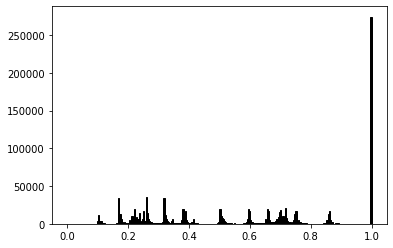

In [24]:
# with matplotlib
# import library
import matplotlib.pyplot as plt

# read image
img = plt.imread('/content/org_image.png')

#calculating histogram
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

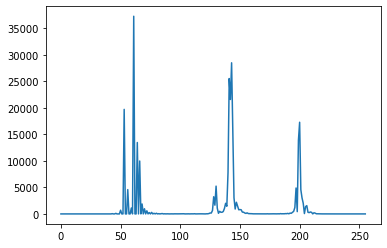

In [25]:
# with openCV
# import library
import cv2

# load an image in grayscale mode
img = cv2.imread('/content/org_image.png',0)
  
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([img],[0],None,[256],[0,256]) 

# show the plotting graph of an image
plt.plot(histg)
plt.show()

Work on the main image

In [26]:
# load an image in grayscale mode
img = cv2.imread('/content/org_image.png',0)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.9719e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

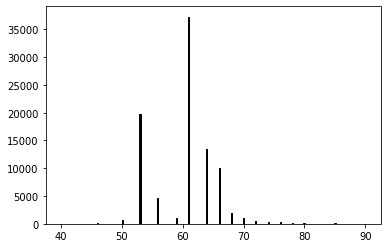

In [27]:
#calculating histogram
plt.hist(img.ravel(), bins=256, range=(40.0, 90.0), fc='k', ec='k')

In [28]:
# segmentations

seg_1 = (img <= 57)
seg_2 = (img > 57) & (img <= 100)
seg_3 = (img > 100) & (img <= 135)
seg_4 = (img > 135) & (img<= 160)
seg_5 = (img > 160)

In [29]:
img.shape

(599, 458)

In [30]:
# creat the segmented image
import numpy as np

all_segments_tog = np.zeros((img.shape[0], img.shape[1], 3))

In [31]:
# color the segments

all_segments_tog[seg_1] = (1,0,0)
all_segments_tog[seg_2] = (0,1,0)
all_segments_tog[seg_3] = (0,0,1)
all_segments_tog[seg_4] = (1,1,0)
all_segments_tog[seg_5] = (0,1,1)

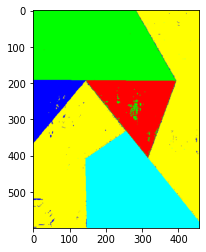

In [32]:
plt.imshow(all_segments_tog)

The segmentation is not neat because the selection of threshold is not perfect.